# Importing Libraries

In [1]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Library for plotting
import matplotlib.pyplot as plt
## Support Vector Machine Libraries
from sklearn.svm import SVC
## Library for calculating performance metrics
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn import preprocessing
## Decision Tree Libraries
from sklearn import tree
from sklearn.model_selection import GridSearchCV
## Adaboost Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import pylab
from time import time
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## TensorFlow and Keras
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
energydata = pd.read_csv("/users/deepmehra/energydata.csv", header=0)

In [3]:
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Dropping Variables

In [4]:
energydata=energydata.drop(['date'], axis=1) #date is not needed
energydata=energydata.drop(['rv2'], axis=1) #dropping rv2 as we observed it had a lot of corelation with rv1 during the corelation plot
energydata.Appliances = energydata.Appliances.astype(float) # to avoid warnings from standardscaler
print("Lights Count\n",energydata["lights"].value_counts())

Lights Count
 0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64


In [5]:
energydata=energydata.drop(['lights'], axis=1) #dropping lights as it contained invalid values

# BoxPlot

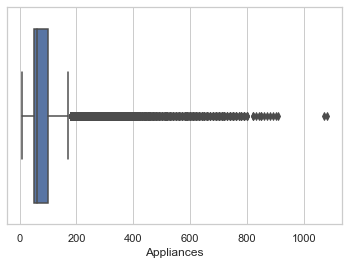

In [6]:
# Boxplot of Target variable to understand the data distrubution and to identify the outliers
sns.set(style="whitegrid")
Box_plot = sns.boxplot(energydata["Appliances"])

# Removing Outliers

In [7]:
energydata = energydata.drop(energydata[(energydata["Appliances"]>800)|(energydata["Appliances"]<0)].index) # Outliers removal
energydata1=energydata

# Data Exploration

In [8]:
# Dataset characteristics

energydata.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
count,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,...,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000,19721.000000
mean,97.131991,21.686812,40.259602,20.340874,40.422093,22.267562,39.242830,20.855730,39.027056,19.592518,...,42.936902,19.486279,41.552819,7.411826,755.520247,79.752185,4.040126,38.324248,3.761192,24.987011
std,100.336903,1.605664,3.979222,2.192418,4.069733,2.004890,3.255033,2.042477,4.341788,1.844467,...,5.224951,2.014304,4.151827,5.316627,7.399409,14.901842,2.451257,11.793399,4.194512,14.495962
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,18.280000,...,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497054
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.611111,...,46.537778,20.600000,44.345000,10.400000,760.933333,91.666667,5.500000,40.000000,6.566667,37.580759
max,800.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530


In [9]:
energydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19721 entries, 0 to 19734
Data columns (total 26 columns):
Appliances     19721 non-null float64
T1             19721 non-null float64
RH_1           19721 non-null float64
T2             19721 non-null float64
RH_2           19721 non-null float64
T3             19721 non-null float64
RH_3           19721 non-null float64
T4             19721 non-null float64
RH_4           19721 non-null float64
T5             19721 non-null float64
RH_5           19721 non-null float64
T6             19721 non-null float64
RH_6           19721 non-null float64
T7             19721 non-null float64
RH_7           19721 non-null float64
T8             19721 non-null float64
RH_8           19721 non-null float64
T9             19721 non-null float64
RH_9           19721 non-null float64
T_out          19721 non-null float64
Press_mm_hg    19721 non-null float64
RH_out         19721 non-null float64
Windspeed      19721 non-null float64
Visibility     19

In [10]:
energydata.head() # Display the first 5 rows

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
0,60.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,60.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,50.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,50.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389
4,60.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097


In [11]:
#number of rows and columns
print("Number of rows in dataset = {}".format(energydata.shape[0]))
print("Total number of columns = {}".format(energydata.columns.shape[0]))

Number of rows in dataset = 19721
Total number of columns = 26


In [12]:
print("Column wise count of null values:-")
print(energydata.isnull().sum())#Number of null values in all columns

Column wise count of null values:-
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
dtype: int64


In [13]:
#Dividing the columns based on type for clear column management
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"] # Columns for temperature sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"] # Columns for humidity sensors
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"] # Columns for weather data
target = ["Appliances"] # Target variable column

In [14]:
print(energydata[temp_cols].describe())
print(energydata[rho_cols].describe())
print(energydata[weather_cols].describe())
print(energydata[target].describe())

                 T1            T2            T3            T4            T5  \
count  19721.000000  19721.000000  19721.000000  19721.000000  19721.000000   
mean      21.686812     20.340874     22.267562     20.855730     19.592518   
std        1.605664      2.192418      2.004890      2.042477      1.844467   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.533333     18.280000   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.611111   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9  
count  19721.000000  19721.000000  19721.000000  19721.000000  
mean       7.910693     20.267429     22.029433     19.486279  
std        6.088948      2.109567      1.955968      2.014304  
min       -6.065000     15.39000

# Plotting Histograms

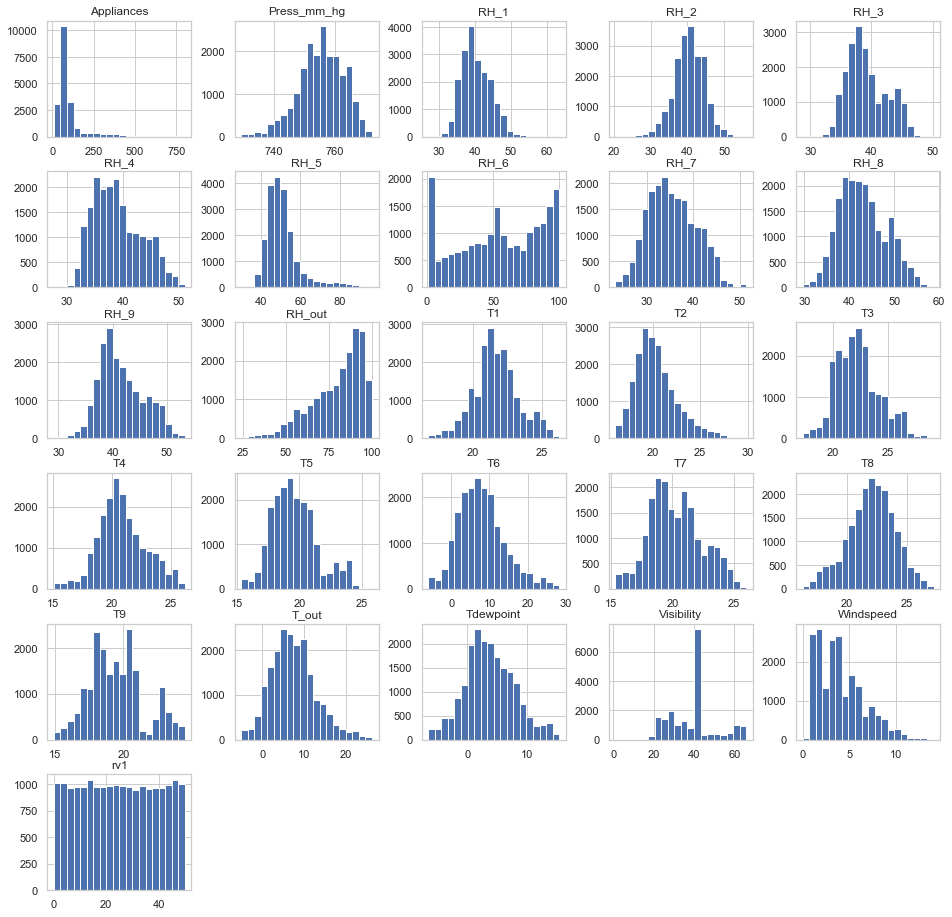

In [15]:
Histograms = energydata.hist(figsize=(16, 16), bins=20)

# Correlation Matrix

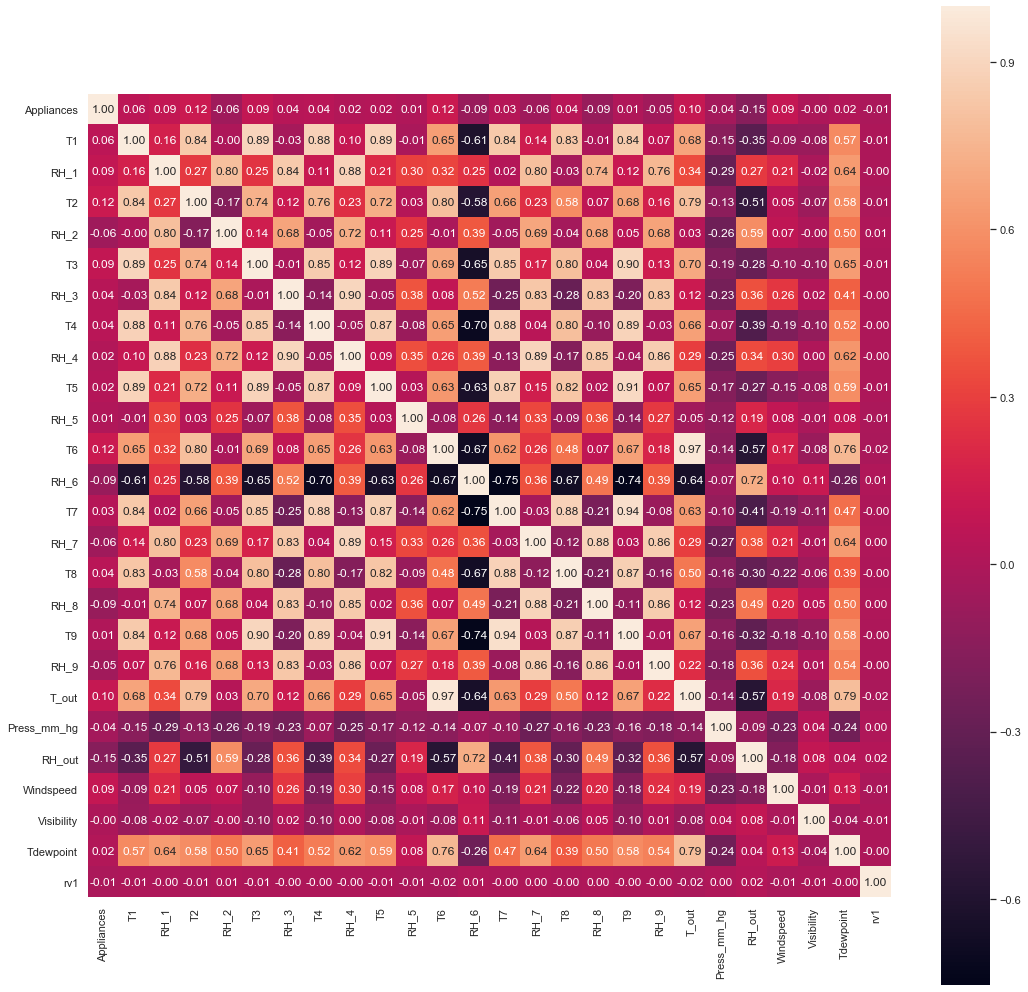

In [16]:
#Correlation matrix
Col=energydata.columns
corr = energydata.corr() #Correlation
plt.figure(figsize = (18,18))       #corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=Col, yticklabels=Col)
plt.show();

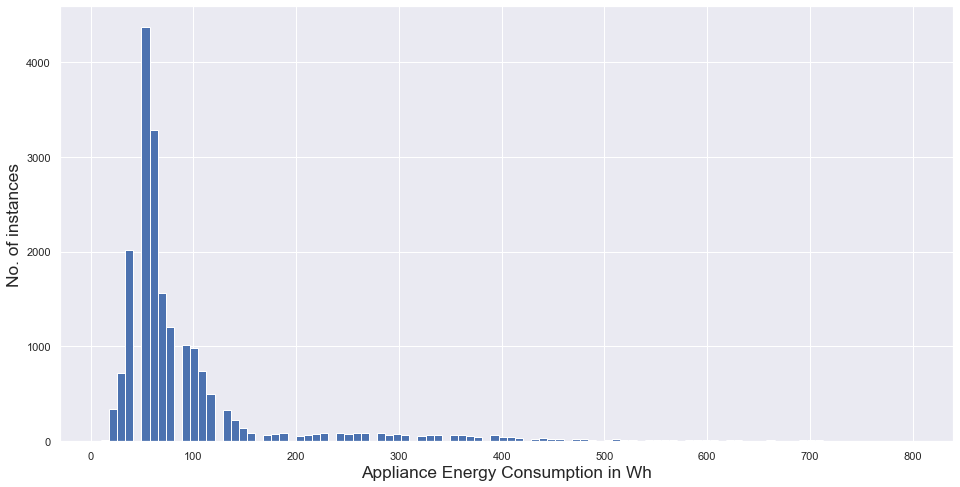

In [17]:
# Histogram for appliances

plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")

energydata["Appliances"].hist(figsize=(16, 8), bins=100)

# Linear Regression

In [18]:
# Importing the data v1 for Linear Model
def importdata1(): 
    energydata = pd.read_csv("/users/deepmehra/energydata.csv", header=0)
    energydata = energydata.drop(['rv2'], axis=1)
    energydata = energydata.drop(['date'], axis=1)
    energydata.Appliances = energydata.Appliances.astype(int)
    mean_Appliances = energydata['Appliances'].mean(skipna=True)
    #energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances >= mean_Appliances,1)
    #energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances != 1,0) 
    
    # Looking at the observations 
    #print ("Dataset: \n",energydata.head()) 

    
    # Printing 
    #print ("Dataset Length: ", len(energydata)) 
    #print ("Dataset Shape: ", energydata.shape) 
    return energydata
      

# Splitting the dataset
def splitdataset1(energydata): 
  
    # Seperating the target variable   
    X = energydata.values[:, 1:energydata.shape[1]] 
    Y = energydata.values[:, 0]   
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    return X, Y, X_train, X_test, y_train, y_test

In [19]:
from sklearn.linear_model import LinearRegression 
energydata=importdata1()
X, Y, X_train, X_test, y_train, y_test=splitdataset1(energydata)
regr = LinearRegression()   
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 
y_pred = regr.predict(X_test) 

#accuracy = accuracy_score(y_test,y_pred)
parameters = regr.coef_

print("Score on training data : {:.3f}%".format(regr.score(X_train, y_train) * 100))
print("Score on testing data : {:.3f}%".format(regr.score(X_test, y_test) * 100))
print("Parameters \n",parameters)


0.16054559281644842
Score on training data : 16.547%
Score on testing data : 16.055%
Parameters 
 [ 16.38293416  -0.08279366  60.58006265 -39.26844022 -55.98083395
  49.45368292  11.64561385  -5.79951844   1.73282539  -1.62970309
   0.83286253  40.77662992  11.82707368   3.4485039   -9.52047205
  16.13378146 -24.09845022 -29.55344639  -1.65338104 -48.39326712
   0.89880145 -13.69553807   4.43615111   2.21883794  18.73946191
  -0.80930991]


# Logistics Regression

In [20]:
# Importing the data
def importdata(): 
    energydata = pd.read_csv("/users/deepmehra/energydata.csv", header=0)
    energydata = energydata.drop(['date'], axis=1)
    energydata.Appliances = energydata.Appliances.astype(int)
    mean_Appliances = energydata['Appliances'].mean(skipna=True)
    energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances >= mean_Appliances,1)
    energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances != 1,0) 
    
    # Looking at the observations 
    #print ("Dataset: \n",energydata.head()) 

    
    # Printing 
    #print ("Dataset Length: ", len(energydata)) 
    #print ("Dataset Shape: ", energydata.shape) 
    return energydata
      

# Splitting the dataset
def splitdataset(energydata): 
  
    # Seperating the target variable   
    X = energydata.values[:, 1:energydata.shape[1]] 
    Y = energydata.values[:, 0]   
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
 
    return X, Y, X_train, X_test, y_train, y_test

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
energydata=importdata()
X, Y, X_train, X_test, Y_train, Y_test=splitdataset(energydata)
model = LogisticRegression()
model.fit(X_train,Y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(Y_train,predicted_classes)
parameters = model.coef_
print("Score on training data : {:.3f}%".format(model.score(X_train, Y_train) * 100))
print("Score on testing data : {:.3f}%".format(model.score(X_test, Y_test) * 100))
print("Accuracy : ",accuracy)
print("Parameters \n",parameters)

Score on training data : 79.695%
Score on testing data : 79.801%
Accuracy :  0.7969451281308817
Parameters 
 [[ 0.39210541  0.5238584   2.10798629 -0.92334081 -1.39062686  0.72789976
   0.11637165 -0.36628657  0.2475971  -0.02082859  0.15796274  0.99426212
   0.20681314 -0.15845854 -0.24850745  0.80127396 -0.78739115 -0.94663014
  -0.55142724 -1.15060653  0.02708026 -0.43530955  0.11710024  0.03905029
   0.58078738 -0.00272871 -0.00272871]]


/Users/deepmehra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM - Linear and Gaussian Kernel

In [22]:
def svm():
    energydata =importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(energydata)
    svclassifier = SVC(kernel='linear')
    start = time() 
    svclassifier.fit(X_train, y_train)
    end = time()
    y_pred = svclassifier.predict(X_test)
    print("Confusion Matrix (Linear) : \n",confusion_matrix(y_test,y_pred))
    print("Report by Linear kernel : \n",classification_report(y_test,y_pred))
    print ("Accuracy by Linear kernel is :- ", accuracy_score(y_test,y_pred)*100)
    print ("Time by linear kernel is :- ", end-start)

In [23]:
svm()

Confusion Matrix (Linear) : 
 [[4123  240]
 [ 965  593]]
Report by Linear kernel : 
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      4363
         1.0       0.71      0.38      0.50      1558

    accuracy                           0.80      5921
   macro avg       0.76      0.66      0.68      5921
weighted avg       0.78      0.80      0.77      5921

Accuracy by Linear kernel is :-  79.64870798851545
Time by linear kernel is :-  9.702399969100952


In [24]:
def gaussian_svm():
    energydata=importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(energydata)
    svclassifier = SVC(kernel='rbf')
    start=time()
    svclassifier.fit(X_train, y_train)
    end=time()
    y_pred = svclassifier.predict(X_test)
    print("Confusion Matrix (Gaussian Kernel) : \n")
    print(confusion_matrix(y_test, y_pred))
    print("Report by Gaussian Kernel: \n")
    print(classification_report(y_test, y_pred))  
    print ("Accuracy by Gaussian Kernel is :- ") 
    print(accuracy_score(y_test,y_pred)*100)
    print ("Time by Gaussian kernel is :- ", end-start)

In [25]:
gaussian_svm()

Confusion Matrix (Gaussian Kernel) : 

[[4124  239]
 [ 705  853]]
Report by Gaussian Kernel: 

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4363
         1.0       0.78      0.55      0.64      1558

    accuracy                           0.84      5921
   macro avg       0.82      0.75      0.77      5921
weighted avg       0.83      0.84      0.83      5921

Accuracy by Gaussian Kernel is :- 
84.05674717108596
Time by Gaussian kernel is :-  5.698102951049805


# Decision Trees - Gini and Entropy

In [26]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
    
    # Decision tree with Gini
    clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth=4) 
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
    
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [27]:
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 4) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [28]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:\n") 
    print(y_pred) 
    return y_pred 

In [29]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred))

In [30]:
# Defining funcion
def main(): 
      
    # Building the test train set
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
    print("Results Using Gini Index: \n")       
    # Prediction using gini index
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy: \n") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
    print("DECISION TREE: \n") 

In [31]:
# Calling the main function
if __name__=="__main__": 
    main()

Results Using Gini Index: 

Predicted values:

[0. 1. 0. ... 1. 0. 0.]
Confusion Matrix: 
 [[4227  136]
 [1255  303]]
Accuracy : 
 76.50734673197096
Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      4363
         1.0       0.69      0.19      0.30      1558

    accuracy                           0.77      5921
   macro avg       0.73      0.58      0.58      5921
weighted avg       0.75      0.77      0.71      5921

Results Using Entropy: 

Predicted values:

[0. 1. 0. ... 1. 0. 0.]
Confusion Matrix: 
 [[4206  157]
 [1248  310]]
Accuracy : 
 76.27090018577944
Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      4363
         1.0       0.66      0.20      0.31      1558

    accuracy                           0.76      5921
   macro avg       0.72      0.58      0.58      5921
weighted avg       0.74      0.76      0.71      5921

DECISION TREE: 



# K Nearest Neighbors - Added experiments with distance metrics

In [32]:
# Importing the data
def importdata(): 
    energydata = pd.read_csv("/users/deepmehra/energydata.csv", header=0)
    energy=energy.drop(['date'], axis=1)
    energy=energy.drop(['rv2'], axis=1)
    energy=energy.drop(['T9'], axis=1)
    energy=energy.drop(['T_out'], axis=1)
    
    energy.Appliances = energy.Appliances.astype(int)
    mean_Appliances = energy['Appliances'].mean(skipna=True)
    energy['Appliances']=energy.Appliances.mask(energy.Appliances >= mean_Appliances,1)
    energy['Appliances']=energy.Appliances.mask(energy.Appliances != 1,0) 
    
    return energy

# Function to split the dataset 
def splitdataset(energy): 
    X = energy.values[:, 1:energy.shape[1]] 
    Y = energy.values[:, 0]   
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    return X, Y, X_train, X_test, y_train, y_test


In [56]:
#Plotting various matrices and accuracy score for both train and test dataset
X, Y, X_train, X_test, y_train, y_test=splitdataset2(importdata2())
acc_score=[]
acc_score_train=[]
y_=[]
for i in range (4,15):
    model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    y_.append(y_pred)
    print(confusion_matrix(y_test,y_pred),'(Test)k =', i)
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_train,y_pred_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred_train))
    print(accuracy_score(y_train,y_pred_train))
    acc_score.append(accuracy_score(y_test,y_pred))
    acc_score_train.append(accuracy_score(y_train,y_pred_train))

[[4212  151]
 [ 641  917]] (Test)k = 4
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      4363
         1.0       0.86      0.59      0.70      1558

    accuracy                           0.87      5921
   macro avg       0.86      0.78      0.81      5921
weighted avg       0.87      0.87      0.86      5921

0.8662388110116535
[[9959  202]
 [1034 2619]] (Train)k = 4
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     10161
         1.0       0.93      0.72      0.81      3653

    accuracy                           0.91     13814
   macro avg       0.92      0.85      0.88     13814
weighted avg       0.91      0.91      0.91     13814

0.9105255537860142
[[4094  269]
 [ 492 1066]] (Test)k = 5
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4363
         1.0       0.80      0.68      0.74      1558

    accuracy              

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy - Euclidean distance')

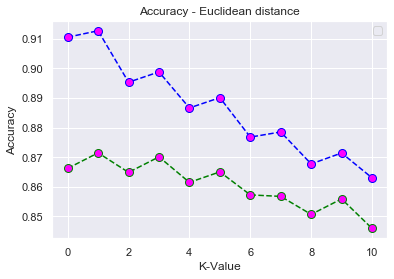

In [57]:
plt.plot(acc_score, color='green', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.plot(acc_score_train, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Accuracy - Euclidean distance")

[[4206  157]
 [ 529 1029]] (Test)k = 4
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      4363
         1.0       0.87      0.66      0.75      1558

    accuracy                           0.88      5921
   macro avg       0.88      0.81      0.84      5921
weighted avg       0.88      0.88      0.88      5921

0.8841411923661544
[[9970  191]
 [ 849 2804]] (Train)k = 4
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10161
         1.0       0.94      0.77      0.84      3653

    accuracy                           0.92     13814
   macro avg       0.93      0.87      0.90     13814
weighted avg       0.93      0.92      0.92     13814

0.9247140582018243
[[4110  253]
 [ 392 1166]] (Test)k = 5
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      4363
         1.0       0.82      0.75      0.78      1558

    accuracy              

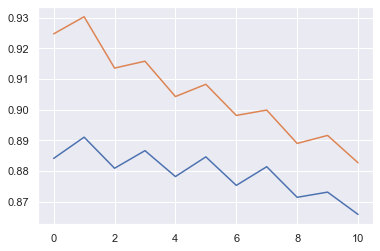

In [58]:
X, Y, X_train, X_test, y_train, y_test=splitdataset2(importdata2())
acc_score1=[]
acc_score1_train=[]
y1_=[]
for i in range (4,15):
    model1 = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    model1.fit(X_train,y_train)
    y_pred1=model1.predict(X_test)
    y_pred1_train=model1.predict(X_train)
    y1_.append(y_pred1)
    print(confusion_matrix(y_test,y_pred1),'(Test)k =', i)
    print(classification_report(y_test,y_pred1))
    print(accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_train,y_pred1_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred1_train))
    print(accuracy_score(y_train,y_pred1_train))
    acc_score1.append(accuracy_score(y_test,y_pred1))
    acc_score1_train.append(accuracy_score(y_train,y_pred1_train))
plt.plot(acc_score1)
plt.plot(acc_score1_train)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy - Manhattan distance')

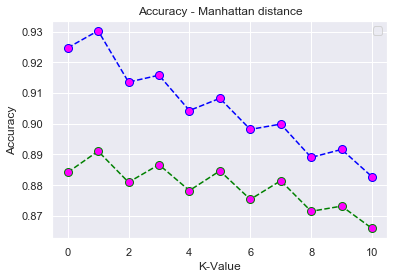

In [59]:
plt.plot(acc_score1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.plot(acc_score1_train, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Accuracy - Manhattan distance")

[[4212  151]
 [ 641  917]] (Test)k = 4
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      4363
         1.0       0.86      0.59      0.70      1558

    accuracy                           0.87      5921
   macro avg       0.86      0.78      0.81      5921
weighted avg       0.87      0.87      0.86      5921

0.8662388110116535
[[9959  202]
 [1034 2619]] (Train)k = 4
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     10161
         1.0       0.93      0.72      0.81      3653

    accuracy                           0.91     13814
   macro avg       0.92      0.85      0.88     13814
weighted avg       0.91      0.91      0.91     13814

0.9105255537860142
[[4094  269]
 [ 492 1066]] (Test)k = 5
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4363
         1.0       0.80      0.68      0.74      1558

    accuracy              

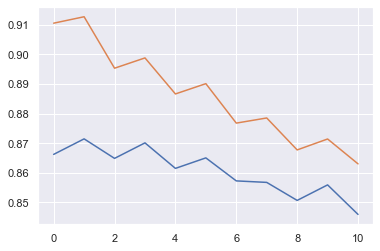

In [60]:
X, Y, X_train, X_test, y_train, y_test=splitdataset2(importdata2())
acc_score2=[]
acc_score2_train=[]
y2_=[]
for i in range (4,15):
    model2 = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    model2.fit(X_train,y_train)
    y_pred2=model2.predict(X_test)
    y_pred2_train=model2.predict(X_train)
    y2_.append(y_pred2)
    print(confusion_matrix(y_test,y_pred2),'(Test)k =', i)
    print(classification_report(y_test,y_pred2))
    print(accuracy_score(y_test,y_pred2))
    print(confusion_matrix(y_train,y_pred2_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred2_train))
    print(accuracy_score(y_train,y_pred2_train))
    acc_score2.append(accuracy_score(y_test,y_pred2))
    acc_score2_train.append(accuracy_score(y_train,y_pred2_train))
plt.plot(acc_score2)
plt.plot(acc_score2_train)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy - Minkowski distance')

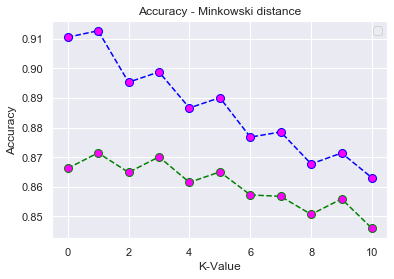

In [61]:
plt.plot(acc_score2, color='green', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.plot(acc_score2_train, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Accuracy - Minkowski distance")

# ANN - Experimentation with Neurons, Activation Function and Optimizers

In [39]:
# Importing the data v2 for ANN Model
def importdata2(): 
    energydata = pd.read_csv("/users/deepmehra/energydata.csv", header=0)
    energydata = energydata.drop(['rv2'], axis=1)
    energydata = energydata.drop(['date'], axis=1)
    energydata.Appliances = energydata.Appliances.astype(int)
    mean_Appliances = energydata['Appliances'].mean(skipna=True)
    energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances >= mean_Appliances,1)
    energydata['Appliances']=energydata.Appliances.mask(energydata.Appliances != 1,0) 
    
    # Looking at the observations 
    #print ("Dataset: \n",energydata.head()) 

    
    # Printing 
    #print ("Dataset Length: ", len(energydata)) 
    #print ("Dataset Shape: ", energydata.shape) 
    return energydata
      

# Splitting the dataset
def splitdataset2(energydata): 
  
    # Seperating the target variable   
    X = energydata.values[:, 1:energydata.shape[1]] 
    Y = energydata.values[:, 0]   
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    return X, Y, X_train, X_test, y_train, y_test

Epoch 1/10
13814/13814 [==============================] - 2s 133us/step - loss: 0.4580 - accuracy: 0.7871
Epoch 2/10
13814/13814 [==============================] - 1s 107us/step - loss: 0.4118 - accuracy: 0.8160
Epoch 3/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.3921 - accuracy: 0.8243
Epoch 4/10
13814/13814 [==============================] - 2s 112us/step - loss: 0.3762 - accuracy: 0.8297
Epoch 5/10
13814/13814 [==============================] - 2s 145us/step - loss: 0.3630 - accuracy: 0.8347
Epoch 6/10
13814/13814 [==============================] - 2s 160us/step - loss: 0.3527 - accuracy: 0.8372
Epoch 7/10
13814/13814 [==============================] - 2s 164us/step - loss: 0.3467 - accuracy: 0.8413
Epoch 8/10
13814/13814 [==============================] - 2s 169us/step - loss: 0.3361 - accuracy: 0.8460
Epoch 9/10
13814/13814 [==============================] - 2s 169us/step - loss: 0.3299 - accuracy: 0.8500
Epoch 10/10
13814/13814 [=====================

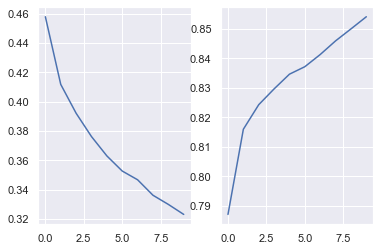

In [40]:
## Hidden Layers = 3 - First hidden layer with 150 neurons, second & Third  with 50 & 25 neurons
## Activation function -  relu
X, Y, X_train, X_test, y_train, y_test=splitdataset2(importdata2())
input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(X_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict))  
print(classification_report(y_test1,y_predict))
acc_score3=accuracy_score(y_test1,y_predict)
print(acc_score3)

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])


Epoch 1/10
13814/13814 [==============================] - 2s 142us/step - loss: 0.4752 - accuracy: 0.7796
Epoch 2/10
13814/13814 [==============================] - 2s 121us/step - loss: 0.4552 - accuracy: 0.7935
Epoch 3/10
13814/13814 [==============================] - 1s 103us/step - loss: 0.4502 - accuracy: 0.7948
Epoch 4/10
13814/13814 [==============================] - 1s 100us/step - loss: 0.4489 - accuracy: 0.7955
Epoch 5/10
13814/13814 [==============================] - 1s 93us/step - loss: 0.4437 - accuracy: 0.7968
Epoch 6/10
13814/13814 [==============================] - 1s 94us/step - loss: 0.4390 - accuracy: 0.7965
Epoch 7/10
13814/13814 [==============================] - 1s 96us/step - loss: 0.4327 - accuracy: 0.7980
Epoch 8/10
13814/13814 [==============================] - 1s 95us/step - loss: 0.4263 - accuracy: 0.8053
Epoch 9/10
13814/13814 [==============================] - 1s 94us/step - loss: 0.4226 - accuracy: 0.8092
Epoch 10/10
13814/13814 [==========================

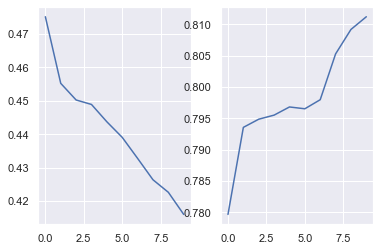

In [41]:
## Hidden Layers = 2; First hidden layer = 50 neurons; Second hidden Layer = 25 neurons 
## Activation function = tanh

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist1 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict1 = classifier.predict(X_test)
y_predict1 = np.where(y_predict1 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict1))  
print(classification_report(y_test1,y_predict1))
acc_score4=accuracy_score(y_test1,y_predict1)
print(acc_score4)

plt.subplot(1,2,1)
plt.plot(hist1.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist1.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 134us/step - loss: 0.4771 - accuracy: 0.7781
Epoch 2/10
13814/13814 [==============================] - 1s 109us/step - loss: 0.4581 - accuracy: 0.78790s - loss:
Epoch 3/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.4532 - accuracy: 0.7927
Epoch 4/10
13814/13814 [==============================] - 1s 104us/step - loss: 0.4522 - accuracy: 0.7931
Epoch 5/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.4476 - accuracy: 0.7964
Epoch 6/10
13814/13814 [==============================] - 1s 108us/step - loss: 0.4443 - accuracy: 0.7964
Epoch 7/10
13814/13814 [==============================] - 2s 114us/step - loss: 0.4379 - accuracy: 0.8001
Epoch 8/10
13814/13814 [==============================] - 2s 116us/step - loss: 0.4315 - accuracy: 0.8066
Epoch 9/10
13814/13814 [==============================] - 2s 116us/step - loss: 0.4216 - accuracy: 0.8121
Epoch 10/10
13814/13814 [===========

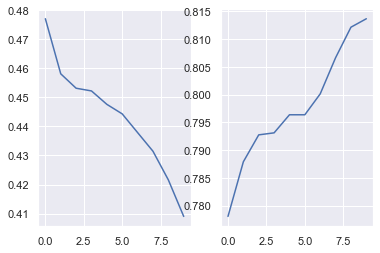

In [42]:
## Number of Hidden Layers = 3; First hidden layer = 100 neurons; Second =  50; Third = 25 
## Activation fucntion tanh

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist2 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict2 = classifier.predict(X_test)
y_predict2 = np.where(y_predict2 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict2))  
print(classification_report(y_test1,y_predict2))
acc_score5=accuracy_score(y_test1,y_predict2)
print(acc_score5)

plt.subplot(1,2,1)
plt.plot(hist2.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist2.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 136us/step - loss: 0.4590 - accuracy: 0.7838
Epoch 2/10
13814/13814 [==============================] - 2s 120us/step - loss: 0.4107 - accuracy: 0.81370s - loss: 0.4140 - accura
Epoch 3/10
13814/13814 [==============================] - 2s 120us/step - loss: 0.3859 - accuracy: 0.8259
Epoch 4/10
13814/13814 [==============================] - 2s 137us/step - loss: 0.3728 - accuracy: 0.8273
Epoch 5/10
13814/13814 [==============================] - 2s 136us/step - loss: 0.3578 - accuracy: 0.8368
Epoch 6/10
13814/13814 [==============================] - 2s 132us/step - loss: 0.3469 - accuracy: 0.8402
Epoch 7/10
13814/13814 [==============================] - 2s 124us/step - loss: 0.3343 - accuracy: 0.8485
Epoch 8/10
13814/13814 [==============================] - 2s 121us/step - loss: 0.3258 - accuracy: 0.8531
Epoch 9/10
13814/13814 [==============================] - 2s 118us/step - loss: 0.3156 - accuracy: 0.8587
Epoch 10/10
13814/13

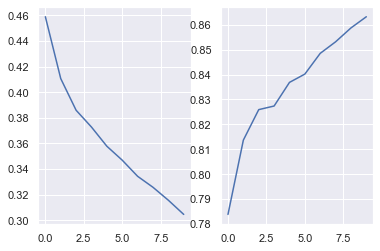

In [43]:
## Number of hidden layers = 4; First hidden layer = 150 neurons; second = 100; Third = 50 neurons; Fourth = 50
## Activation fucntion = tanh

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist3 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict3 = classifier.predict(X_test)
y_predict3 = np.where(y_predict3 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict3))  
print(classification_report(y_test1,y_predict3))
acc_score6=accuracy_score(y_test1,y_predict3)
print(acc_score6)

plt.subplot(1,2,1)
plt.plot(hist3.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist3.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 131us/step - loss: 0.5985 - accuracy: 0.7522
Epoch 2/10
13814/13814 [==============================] - 2s 122us/step - loss: 0.5090 - accuracy: 0.7585
Epoch 3/10
13814/13814 [==============================] - 2s 122us/step - loss: 0.5095 - accuracy: 0.7575
Epoch 4/10
13814/13814 [==============================] - 2s 122us/step - loss: 0.5153 - accuracy: 0.7554
Epoch 5/10
13814/13814 [==============================] - 2s 115us/step - loss: 0.5829 - accuracy: 0.7358
Epoch 6/10
13814/13814 [==============================] - 2s 119us/step - loss: 0.5358 - accuracy: 0.74000s - loss: 0
Epoch 7/10
13814/13814 [==============================] - 2s 110us/step - loss: 0.5380 - accuracy: 0.7377
Epoch 8/10
13814/13814 [==============================] - 2s 133us/step - loss: 0.5158 - accuracy: 0.7606
Epoch 9/10
13814/13814 [==============================] - 2s 135us/step - loss: 0.4909 - accuracy: 0.75420s - loss: 0.4977 - ac
Epoch 10/10


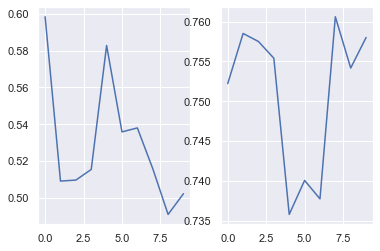

In [44]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons 
## Full activation fucntion = tanh

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'tanh'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist4 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict4 = classifier.predict(X_test)
y_predict4 = np.where(y_predict4 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict4))  
print(classification_report(y_test1,y_predict4))
acc_score7=accuracy_score(y_test1,y_predict4)
print(acc_score7)

plt.subplot(1,2,1)
plt.plot(hist4.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist4.history['accuracy'])



Epoch 1/10
13814/13814 [==============================] - 2s 133us/step - loss: 0.5422 - accuracy: 0.73561s
Epoch 2/10
13814/13814 [==============================] - 2s 109us/step - loss: 0.4671 - accuracy: 0.7762
Epoch 3/10
13814/13814 [==============================] - 2s 111us/step - loss: 0.4546 - accuracy: 0.79071s - loss: 0.463 - ETA: 0s - loss: 0
Epoch 4/10
13814/13814 [==============================] - 1s 108us/step - loss: 0.4492 - accuracy: 0.7934
Epoch 5/10
13814/13814 [==============================] - 1s 108us/step - loss: 0.4438 - accuracy: 0.7972
Epoch 6/10
13814/13814 [==============================] - 1s 107us/step - loss: 0.4403 - accuracy: 0.7990
Epoch 7/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.4364 - accuracy: 0.8002
Epoch 8/10
13814/13814 [==============================] - 1s 107us/step - loss: 0.4333 - accuracy: 0.8016
Epoch 9/10
13814/13814 [==============================] - 1s 107us/step - loss: 0.4295 - accuracy: 0.8056
Epoch 10

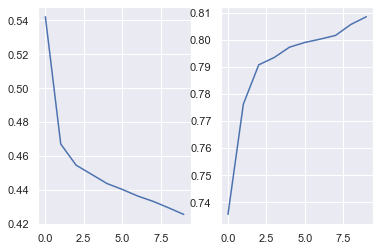

In [45]:
## Number of hidden layers = 3; First = 100; Second =50; Third = 25 neurons 
## Full activation fucntion = sigmoid

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'sigmoid', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist5 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict5 = classifier.predict(X_test)
y_predict5 = np.where(y_predict5 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict5))  
print(classification_report(y_test1,y_predict5))
acc_score8=accuracy_score(y_test1,y_predict5)
print(acc_score8)

plt.subplot(1,2,1)
plt.plot(hist5.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist5.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 130us/step - loss: 0.4800 - accuracy: 0.7836
Epoch 2/10
13814/13814 [==============================] - 2s 118us/step - loss: 0.4564 - accuracy: 0.79070s - los
Epoch 3/10
13814/13814 [==============================] - 2s 134us/step - loss: 0.4534 - accuracy: 0.7921
Epoch 4/10
13814/13814 [==============================] - 2s 132us/step - loss: 0.4506 - accuracy: 0.7941
Epoch 5/10
13814/13814 [==============================] - 2s 119us/step - loss: 0.4481 - accuracy: 0.7942
Epoch 6/10
13814/13814 [==============================] - 1s 104us/step - loss: 0.4415 - accuracy: 0.7998
Epoch 7/10
13814/13814 [==============================] - 2s 139us/step - loss: 0.4390 - accuracy: 0.8030
Epoch 8/10
13814/13814 [==============================] - 2s 142us/step - loss: 0.4344 - accuracy: 0.8022
Epoch 9/10
13814/13814 [==============================] - 2s 158us/step - loss: 0.4304 - accuracy: 0.8056
Epoch 10/10
13814/13814 [=============

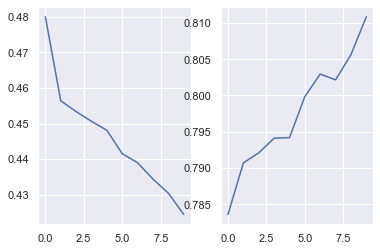

In [46]:
### Experiment various number of neurons with 3 layers and 
## tanh function for hidden layers and sigmoid function for the output layers

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist6 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict6 = classifier.predict(X_test)
y_predict6 = np.where(y_predict6 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict6))  
print(classification_report(y_test1,y_predict6))
acc_score9=accuracy_score(y_test1,y_predict6)
print(acc_score9)

plt.subplot(1,2,1)
plt.plot(hist6.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist6.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 137us/step - loss: 0.4894 - accuracy: 0.7820
Epoch 2/10
13814/13814 [==============================] - 2s 135us/step - loss: 0.4546 - accuracy: 0.7940
Epoch 3/10
13814/13814 [==============================] - 1s 99us/step - loss: 0.4500 - accuracy: 0.7959
Epoch 4/10
13814/13814 [==============================] - 1s 104us/step - loss: 0.4471 - accuracy: 0.7955
Epoch 5/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.4434 - accuracy: 0.7947
Epoch 6/10
13814/13814 [==============================] - 1s 99us/step - loss: 0.4395 - accuracy: 0.7977
Epoch 7/10
13814/13814 [==============================] - 1s 102us/step - loss: 0.4352 - accuracy: 0.7996
Epoch 8/10
13814/13814 [==============================] - 1s 99us/step - loss: 0.4296 - accuracy: 0.8034
Epoch 9/10
13814/13814 [==============================] - 2s 112us/step - loss: 0.4258 - accuracy: 0.80870s - loss: 0.4256 - accuracy: 0.80
Epoch 10/10
138

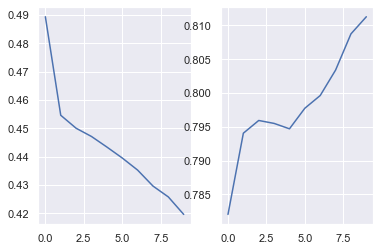

In [47]:

## Number of hidden layers = 4; First = 20; Second =10; Third = 5;
## Activation fucntion = sigmoid

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(20, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist7 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict7 = classifier.predict(X_test)
y_predict7 = np.where(y_predict7 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict7))  
print(classification_report(y_test1,y_predict7))
acc_score10=accuracy_score(y_test1,y_predict7)
print(acc_score10)

plt.subplot(1,2,1)
plt.plot(hist7.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist7.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 153us/step - loss: 0.5180 - accuracy: 0.7350
Epoch 2/10
13814/13814 [==============================] - 1s 108us/step - loss: 0.4544 - accuracy: 0.7771
Epoch 3/10
13814/13814 [==============================] - 2s 136us/step - loss: 0.4373 - accuracy: 0.8035
Epoch 4/10
13814/13814 [==============================] - 1s 108us/step - loss: 0.4261 - accuracy: 0.80820s - loss: 0.425
Epoch 5/10
13814/13814 [==============================] - 2s 114us/step - loss: 0.4179 - accuracy: 0.8111
Epoch 6/10
13814/13814 [==============================] - 2s 115us/step - loss: 0.4129 - accuracy: 0.8119
Epoch 7/10
13814/13814 [==============================] - 2s 114us/step - loss: 0.4074 - accuracy: 0.81440s - l
Epoch 8/10
13814/13814 [==============================] - 1s 106us/step - loss: 0.4036 - accuracy: 0.8187
Epoch 9/10
13814/13814 [==============================] - 2s 116us/step - loss: 0.3994 - accuracy: 0.8208
Epoch 10/10
13814/13814 

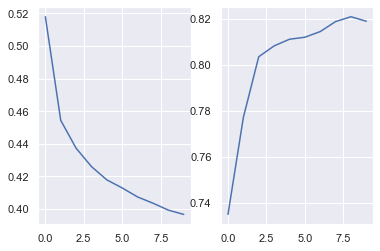

In [48]:
## Number of hidden layers = 4; First = 10; Second =5; Third = 3;
## Ativation fucntion = sigmoid

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist8 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict8 = classifier.predict(X_test)
y_predict8 = np.where(y_predict8 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict8))  
print(classification_report(y_test1,y_predict8))
acc_score11=accuracy_score(y_test1,y_predict8)
print(acc_score11)

plt.subplot(1,2,1)
plt.plot(hist8.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist8.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 1s 97us/step - loss: 0.5962 - accuracy: 0.7352
Epoch 2/10
13814/13814 [==============================] - 1s 82us/step - loss: 0.5777 - accuracy: 0.7356
Epoch 3/10
13814/13814 [==============================] - 1s 83us/step - loss: 0.5776 - accuracy: 0.7356
Epoch 4/10
13814/13814 [==============================] - 1s 81us/step - loss: 0.5775 - accuracy: 0.7356
Epoch 5/10
13814/13814 [==============================] - 1s 89us/step - loss: 0.5774 - accuracy: 0.7356
Epoch 6/10
13814/13814 [==============================] - 1s 98us/step - loss: 0.5772 - accuracy: 0.7356
Epoch 7/10
13814/13814 [==============================] - 1s 101us/step - loss: 0.5767 - accuracy: 0.7356
Epoch 8/10
13814/13814 [==============================] - 1s 95us/step - loss: 0.5755 - accuracy: 0.7356
Epoch 9/10
13814/13814 [==============================] - 1s 86us/step - loss: 0.5714 - accuracy: 0.7356
Epoch 10/10
13814/13814 [=============================

/Users/deepmehra/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


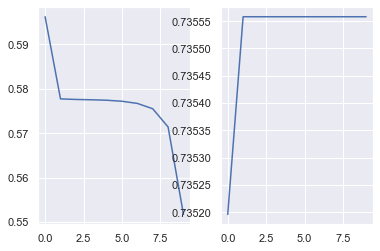

In [49]:

## Experimenting with optimizer fuction: SGD

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'SGD',loss='binary_crossentropy', metrics=['accuracy'])
hist9 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict9 = classifier.predict(X_test)
y_predict9 = np.where(y_predict9 > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict9))  
print(classification_report(y_test1,y_predict9))
acc_score12=accuracy_score(y_test1,y_predict9)
print(acc_score12)

plt.subplot(1,2,1)
plt.plot(hist9.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist9.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 128us/step - loss: 0.4568 - accuracy: 0.7828
Epoch 2/10
13814/13814 [==============================] - 2s 155us/step - loss: 0.4055 - accuracy: 0.8164
Epoch 3/10
13814/13814 [==============================] - 2s 114us/step - loss: 0.3866 - accuracy: 0.8252
Epoch 4/10
13814/13814 [==============================] - 2s 111us/step - loss: 0.3714 - accuracy: 0.8302
Epoch 5/10
13814/13814 [==============================] - 2s 125us/step - loss: 0.3602 - accuracy: 0.8377
Epoch 6/10
13814/13814 [==============================] - 2s 136us/step - loss: 0.3515 - accuracy: 0.8394
Epoch 7/10
13814/13814 [==============================] - 1s 101us/step - loss: 0.3441 - accuracy: 0.8445
Epoch 8/10
13814/13814 [==============================] - 2s 119us/step - loss: 0.3391 - accuracy: 0.8495
Epoch 9/10
13814/13814 [==============================] - 3s 251us/step - loss: 0.3307 - accuracy: 0.8533
Epoch 10/10
13814/13814 [=====================

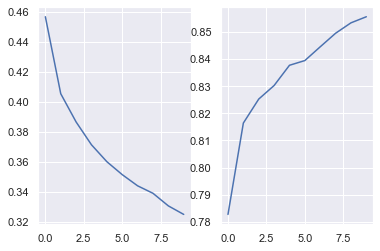

In [50]:
## Experimenting with optimizer fuction: Adadelta

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adadelta',loss='binary_crossentropy', metrics=['accuracy'])
hist10 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict10 = classifier.predict(X_test)
y_predict10 = np.where(y_predict10 > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict10))  
print(classification_report(y_test1,y_predict10))
acc_score13=accuracy_score(y_test1,y_predict10)
print(acc_score13)

plt.subplot(1,2,1)
plt.plot(hist10.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist10.history['accuracy'])

Epoch 1/10
13814/13814 [==============================] - 2s 112us/step - loss: 0.4570 - accuracy: 0.7848
Epoch 2/10
13814/13814 [==============================] - 1s 85us/step - loss: 0.4140 - accuracy: 0.8142
Epoch 3/10
13814/13814 [==============================] - 1s 101us/step - loss: 0.4018 - accuracy: 0.8191
Epoch 4/10
13814/13814 [==============================] - 1s 95us/step - loss: 0.3944 - accuracy: 0.8237
Epoch 5/10
13814/13814 [==============================] - 1s 82us/step - loss: 0.3886 - accuracy: 0.8298
Epoch 6/10
13814/13814 [==============================] - 1s 81us/step - loss: 0.3832 - accuracy: 0.8303
Epoch 7/10
13814/13814 [==============================] - 1s 86us/step - loss: 0.3791 - accuracy: 0.8304
Epoch 8/10
13814/13814 [==============================] - 1s 87us/step - loss: 0.3744 - accuracy: 0.8334
Epoch 9/10
13814/13814 [==============================] - 1s 90us/step - loss: 0.3704 - accuracy: 0.8341
Epoch 10/10
13814/13814 [============================

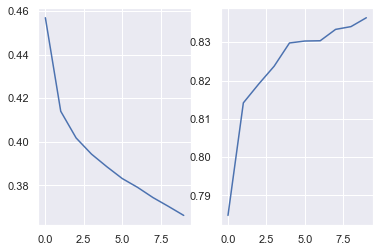

In [51]:
# Experimenting with optimizer fuction: Adagrad

input_shap=X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adagrad',loss='binary_crossentropy', metrics=['accuracy'])
hist11 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict11 = classifier.predict(X_test)
y_predict11 = np.where(y_predict11 > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict11))  
print(classification_report(y_test1,y_predict11))
acc_score14=accuracy_score(y_test1,y_predict11)
print(acc_score14)

plt.subplot(1,2,1)
plt.plot(hist11.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist11.history['accuracy'])

Text(0.5, 1.0, 'Train and Test Accuracy as a function of Number of Hidden Layers in ANN')

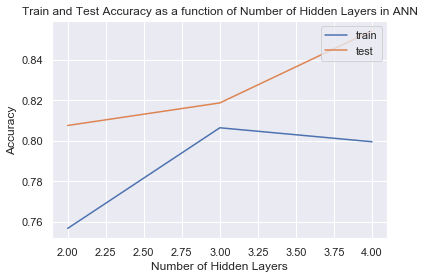

In [52]:
### plots for Train and Test accuracy as a function of Number of layers
test_accuracy = [acc_score4,acc_score5,acc_score6]
train_accuracy=[0.7568,0.8065,0.7996]
layers=[2,3,4]
plt.plot(layers,train_accuracy,label='train')
plt.plot(layers,test_accuracy,label='test')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of Number of Hidden Layers in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Activation functions in ANN')

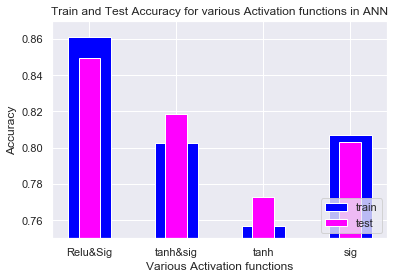

In [53]:
### plots for Train and Test accuracy for various activation functions
test_accuracy = [acc_score3,acc_score5,acc_score7,acc_score8]
train_accuracy=[0.8609,0.8025,0.7565,0.8069]
Act_fun=["Relu&Sig","tanh&sig","tanh","sig"]

plt.bar(Act_fun,train_accuracy,label='train',width=0.5, color = 'blue')
plt.bar(Act_fun,test_accuracy,label='test',width=0.25, color = 'magenta')
plt.xlabel("Various Activation functions")
plt.ylim([0.75, 0.87])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Activation functions in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Number of Neurons')

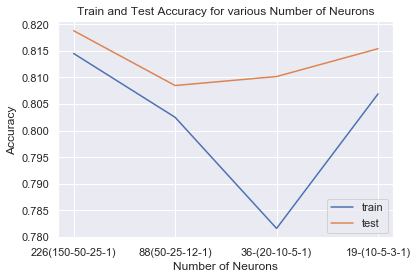

In [54]:
### plots for Train and Test accuracy for Increasing Number of Neurons
test_accuracy = [acc_score5,acc_score9,acc_score10,acc_score11]
train_accuracy=[0.8145,0.8025,0.7816,0.8069]
Num_of_Neurons=["226(150-50-25-1)","88(50-25-12-1)","36-(20-10-5-1)","19-(10-5-3-1)"]

plt.plot(Num_of_Neurons,train_accuracy,label='train')
plt.plot(Num_of_Neurons,test_accuracy,label='test')
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Number of Neurons")

Text(0.5, 1.0, 'Train and Test Accuracy for various Optimizer functions in ANN')

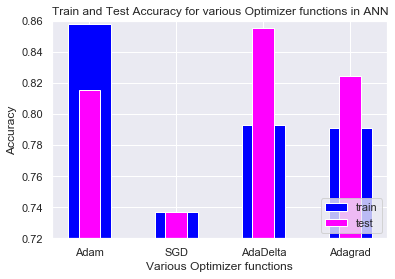

In [55]:
### Plots for Train and Test Accuracy for various optimizer function
test_accuracy = [acc_score11,acc_score12,acc_score13,acc_score14]
train_accuracy=[0.8579,0.7368,0.793,0.7912]
Opt_fun=["Adam","SGD","AdaDelta","Adagrad"]

plt.bar(Opt_fun,train_accuracy,label='train',width=0.5, color = 'blue')
plt.bar(Opt_fun,test_accuracy,label='test',width=0.25, color = 'magenta')
plt.xlabel("Various Optimizer functions")
plt.ylim([0.72, 0.86])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Optimizer functions in ANN")